<a href="https://colab.research.google.com/github/GokulGS/CloudComputing/blob/main/Cloud_computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas import Series
from datetime import datetime
from google.colab import drive
from pandasql import sqldf
drive.mount('/content/gdrive')

pysqldf = lambda q: sqldf(q, globals())

Mounted at /content/gdrive


In [ ]:
data1=pd.read_csv('/content/gdrive/MyDrive/Cloud_computing/application-checkpoints.csv')
data2=pd.read_csv('/content/gdrive/MyDrive/Cloud_computing/task-x-y.csv')
data3=pd.read_csv('/content/gdrive/MyDrive/Cloud_computing/gpu.csv')


In [ ]:
data3

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08T08:27:10.424Z,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08T08:27:10.937Z,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47
...,...,...,...,...,...,...,...,...
1543676,2018-11-08T08:31:18.873Z,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.99,30,0,0
1543677,2018-11-08T08:31:24.933Z,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.90,29,0,0
1543678,2018-11-08T08:31:32.998Z,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.88,29,0,0
1543679,2018-11-08T08:31:39.057Z,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.89,29,0,0


In [ ]:
q1="""select timestamp,hostname,eventName,eventType,jobId,taskId,count(*) from data1 group by 1,2,3,4,5,6 having count(*)>1;"""
dup_rec=pysqldf(q1)

In [ ]:
q2="""select timestamp,hostname,eventName,eventType,jobId,taskId,count(*) from data1 group by 1,2,3,4,5,6 having count(*)=1;"""
non_dup_rec=pysqldf(q2)


In [ ]:
q1_3="""select timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,count(*) from data3 group by 1,2,3,4,5,6,7,8 having count(*)>1;"""
dup_rec3=pysqldf(q1_3)
dup_rec3

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,count(*)
0,2018-11-08T07:43:19.778Z,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,60.37,38,93,54,2
1,2018-11-08T07:43:23.824Z,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,43.21,36,0,0,2
2,2018-11-08T07:46:04.325Z,35bd84d72aca403b8129a7d652cc2750000005,323617020221,GPU-b13cf133-c12e-5f48-a795-61856ae771e8,92.20,39,92,43,2
3,2018-11-08T07:48:43.802Z,35bd84d72aca403b8129a7d652cc2750000005,323617020221,GPU-b13cf133-c12e-5f48-a795-61856ae771e8,112.29,38,92,50,2
4,2018-11-08T07:56:41.454Z,95b4ae6d890e4c46986d91d7ac4bf082000010,320118119713,GPU-a14dcc82-9a35-9854-6277-af0b9bb5425c,111.67,42,91,43,2
5,2018-11-08T08:12:14.603Z,4a79b6d2616049edbf06c6aa58ab426a00000Y,325017019048,GPU-0771789c-80d8-8e20-5ac7-55559be6e4fe,26.04,36,0,0,2
6,2018-11-08T08:12:30.765Z,4a79b6d2616049edbf06c6aa58ab426a00000Y,325017019048,GPU-0771789c-80d8-8e20-5ac7-55559be6e4fe,138.41,41,92,54,2
7,2018-11-08T08:12:40.863Z,4a79b6d2616049edbf06c6aa58ab426a00000Y,325017019048,GPU-0771789c-80d8-8e20-5ac7-55559be6e4fe,94.02,42,93,54,2
8,2018-11-08T08:17:57.616Z,4a79b6d2616049edbf06c6aa58ab426a00000Y,325017019048,GPU-0771789c-80d8-8e20-5ac7-55559be6e4fe,25.62,39,0,0,2


In [ ]:
q1_4="""select timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,count(*) from data3 group by 1,2,3,4,5,6,7,8 having count(*)=1;"""
non_dup_rec3=pysqldf(q1_4)
non_dup_rec3

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,count(*)
0,2018-11-08T07:41:25.772Z,8b6a0eebc87b4cb2b0539e81075191b9000009,323617020088,GPU-9477ad99-3f4a-88d1-1b59-6319b7d1e39d,26.22,30,0,0,1
1,2018-11-08T07:41:25.772Z,d8241877cd994572b46c861e5d144c85000017,323617020449,GPU-e7c85eef-7253-2919-5f20-4a6325716726,25.20,32,0,0,1
2,2018-11-08T07:41:25.776Z,35bd84d72aca403b8129a7d652cc2750000008,323217056293,GPU-57c0f325-92d5-41f2-a150-9b29b8317776,25.84,31,0,0,1
3,2018-11-08T07:41:25.778Z,4ad946d4435c42dabb5073531ea4f31500000Z,325217085771,GPU-a2a14699-64df-bf7a-c5c7-7daa271482ac,26.32,29,0,0,1
4,2018-11-08T07:41:25.782Z,4c72fae95b9147189a0559269a6953ff00000A,325017020014,GPU-feeb9f98-518f-fa06-12ab-d8df1b597944,25.95,27,0,0,1
...,...,...,...,...,...,...,...,...,...
1543658,2018-11-08T08:31:53.566Z,e7adc42d28814e518e9601ac2329c51300000I,325117171578,GPU-f6af85fd-e93f-c0c3-0526-cc79034202ed,25.37,29,0,0,1
1543659,2018-11-08T08:31:53.569Z,db871cd77a544e13bc791a64a0c8ed5000000Z,323617021002,GPU-a12db29f-02b4-0aab-3bfb-63f87bb68b02,26.06,35,0,0,1
1543660,2018-11-08T08:31:53.570Z,04dc4e9647154250beeee51b866b071500000D,323617020436,GPU-7425698c-4893-3305-a2c7-9e8ab31a01c5,26.44,30,0,0,1
1543661,2018-11-08T08:31:53.570Z,35bd84d72aca403b8129a7d652cc2750000006,323217055954,GPU-25b67224-929d-ad52-e9b4-38d3f171c1a5,25.46,30,0,0,1


In [ ]:
from pandas.io.parsers.readers import csv
from os import write
cdata3=non_dup_rec3.iloc[:,:8].append(dup_rec3.iloc[:,:8])


In [ ]:

from google.colab import files
cdata3.to_csv('cdata3.csv', encoding = 'utf-8-sig') 
files.download('cdata3.csv')

In [ ]:
from pandas.io.parsers.readers import csv
from os import write
cdata1=non_dup_rec.iloc[:,:6].append(dup_rec.iloc[:,:6])


In [ ]:

from google.colab import files
cdata1.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

In [ ]:
q3="""select timestamp,hostname,eventName,eventType,jobId,taskId,count(*) from cdata1 group by 1,2,3,4,5,6 having count(*)>1;"""
dup_chek=pysqldf(q3)

dup_chek

,timestamp,hostname,eventName,eventType,jobId,taskId,count(*)


In [ ]:
from pandas.core.reshape.api import pivot_table
q5 ="""select * from cdata1 where eventName='TotalRender' and eventType='START' ;"""

q5=pysqldf(q5)
q5["timestamp"]=q5["timestamp"].astype('datetime64')

print(q5.index)


RangeIndex(start=0, stop=65793, step=1)


In [ ]:
q6 ="""select * from cdata1 where eventName='TotalRender' and eventType='STOP' ;"""

q6=pysqldf(q6)
q6["timestamp"]=q6["timestamp"].astype('datetime64')


In [ ]:
q4 ="""select * from cdata1 inner join data2 on cdata1.taskId = data2.taskId;"""
data1_2=pysqldf(q4)

data1_2["start_dttm"]=data1_2["timestamp"].astype('datetime64')


In [ ]:
q7 ="""select q11.timestamp as start_dttm,q12.timestamp as end_dttm,q11.taskId taskId,q11.jobId jobId, q11.hostname, q11.eventName from (select * from cdata1 where  eventType='START') q11 inner join 
(select * from cdata1 where  eventType='STOP') q12 on q11.jobId=q12.jobId and q11.taskId=q12.taskId and q11.eventName=q12.eventName ;"""

q_1_4=pysqldf(q7)
q_1_4["start_dttm"]=q_1_4["start_dttm"].astype('datetime64')
q_1_4["end_dttm"]=q_1_4["end_dttm"].astype('datetime64')
q_1_4['delta_dttm']=q_1_4['end_dttm']-q_1_4['start_dttm']

# arranging in descending order
q_1_4=q_1_4.sort_values(by='delta_dttm', ascending=False)


In [ ]:
q8 = """select * from q_1_4 where eventName = 'Render'"""
render=pysqldf(q8)
render["start_dttm"]=render["start_dttm"].astype('datetime64')
render["end_dttm"]=render["end_dttm"].astype('datetime64')
render['delta_dttm']=render['end_dttm']-render['start_dttm']
render=render.sort_values(by='delta_dttm', ascending=False)
render

In [ ]:
q9 = """select * from q_1_4 where eventName = 'Saving Config'"""
saveconfig=pysqldf(q9)
saveconfig["start_dttm"]=saveconfig["start_dttm"].astype('datetime64')
saveconfig["end_dttm"]=saveconfig["end_dttm"].astype('datetime64')
saveconfig['delta_dttm']=saveconfig['end_dttm']-saveconfig['start_dttm']
saveconfig=saveconfig.sort_values(by='delta_dttm', ascending=False)
saveconfig


In [ ]:
q10 = """select * from q_1_4 where eventName = 'Tiling'"""
Tiling=pysqldf(q10)
Tiling["start_dttm"]=Tiling["start_dttm"].astype('datetime64')
Tiling["end_dttm"]=Tiling["end_dttm"].astype('datetime64')
Tiling['delta_dttm']=Tiling['end_dttm']-Tiling['start_dttm']
Tiling=Tiling.sort_values(by='delta_dttm', ascending=False)
Tiling


In [ ]:
q10 = """select * from q_1_4 where eventName = 'Uploading'"""
Uploading=pysqldf(q10)
Uploading["start_dttm"]=Uploading["start_dttm"].astype('datetime64')
Uploading["end_dttm"]=Uploading["end_dttm"].astype('datetime64')
Uploading['delta_dttm']=Uploading['end_dttm']-Uploading['start_dttm']
Uploading=Uploading.sort_values(by='delta_dttm', ascending=False)
Uploading


In [ ]:
q4 ="""select q_1_4.*, data2.x, data2.y, data2.level from q_1_4 inner join data2 on q_1_4.taskId = data2.taskId where q_1_4.eventName not like '%TotalRender%';"""
data1_2=pysqldf(q4)

data1_2["start_dttm"]=data1_2["start_dttm"].astype('datetime64')
data1_2["end_dttm"]=data1_2["end_dttm"].astype('datetime64')
data1_2['delta_dttm']=data1_2['end_dttm']-data1_2['start_dttm']

# arranging in descending order
data1_2=data1_2.sort_values(by='delta_dttm', ascending=False)


/usr/local/lib/python3.8/dist-packages/pandas/io/sql.py:717: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  pandas_sql.to_sql(


In [ ]:
data1_2['Avg_Time(in Seconds)'] = data1_2['delta_dttm'].dt.total_seconds()

data1_2.groupby('eventName', as_index=False)['Avg_Time(in Seconds)'].mean()


,eventName,Avg_Time(in Seconds)
0,Render,41.208220
1,Saving Config,0.002476
2,Tiling,0.973207
3,Uploading,1.393641


In [ ]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
      plt.text(i, 0.2+y.iloc[i],round(y.iloc[i],2), ha = 'center') 
    

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: ignored

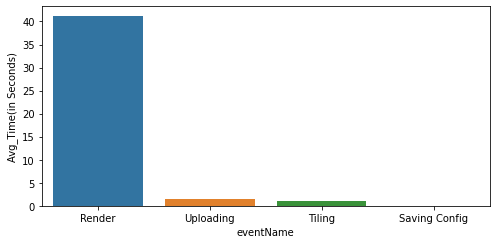

In [ ]:
p = sns.barplot('eventName', 'Avg_Time(in Seconds)', data=data1_2, ci=False)


In [ ]:
data1_2['TotalTime(in Seconds)'] = data1_2['delta_dttm'].dt.total_seconds()
toptask=data1_2.groupby(['taskId','x','y'], as_index=False)['TotalTime(in Seconds)'].sum()
toptask=toptask.sort_values(['TotalTime(in Seconds)'], ascending=False).head(10)
toptask

,taskId,x,y,TotalTime(in Seconds)
61474,ef15022d-f816-4434-b41e-709cb996bc08,3,7,94.695
30697,76fb8e93-c3a6-456c-9661-3b7407800027,70,6,90.351
33805,83064f91-5a19-4526-8673-38ab28dd3ab7,14,1,89.292
43629,a95d501e-d5d5-4fb4-9119-98120bf6f4d5,91,105,83.498
9602,25b410b5-f5ef-4a2f-8b21-29175bca35fc,92,106,82.388
53962,d194b27d-d421-47d3-ae41-eed07a00e8d4,92,107,79.752
62904,f4a61a45-2e92-4aa0-9219-4425ce0ec17e,93,107,77.479
38388,94bfb9b3-80c2-44e7-8869-c29a0007bbe0,93,108,75.919
53582,d01f0571-c929-4bb8-9692-5ef053c1da1d,92,104,75.763
20813,51271d84-a39c-4a33-93c0-eda4648ad5bf,95,106,75.555


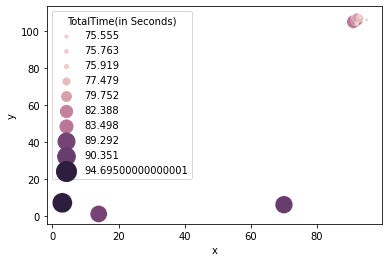

In [ ]:
sns.scatterplot(data=toptask, x="x", y="y", hue="TotalTime(in Seconds)", size="TotalTime(in Seconds)",sizes=(10, 400), legend="full")

In [ ]:
cdata3

In [ ]:
avghostpower=cdata3.groupby('hostname', as_index=False)['powerDrawWatt'].mean()
avghostpower=avghostpower.sort_values(['powerDrawWatt'], ascending=False).head(10)
avghostpower

,hostname,powerDrawWatt
687,a77ef58b13ad4c01b769dac8409af3f800000D,106.247462
904,db871cd77a544e13bc791a64a0c8ed5000000U,101.974324
37,04dc4e9647154250beeee51b866b0715000011,101.549633
441,5903af3699134795af7eafc605ae5fc700000H,99.057575
616,8b6a0eebc87b4cb2b0539e81075191b9000016,98.698678
44,04dc4e9647154250beeee51b866b0715000018,98.250353
357,4ad946d4435c42dabb5073531ea4f31500000X,98.150566
537,83ea61ac1ef54f27a3bf7bd0f41ecaa700000D,97.795836
412,4c72fae95b9147189a0559269a6953ff000012,97.771817
57,0745914f4de046078517041d70b22fe7000007,97.535805


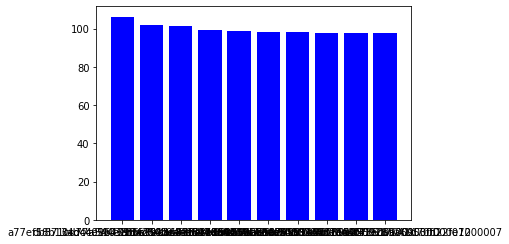

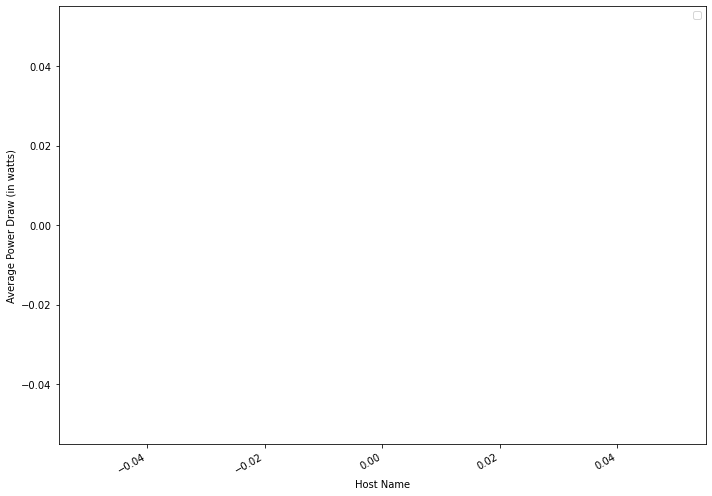

In [ ]:

plt.bar(avghostpower.hostname, avghostpower.powerDrawWatt, color='b')

plt.figure(figsize = (10, 7))

plt.plot()
plt.xticks(rotation=30, ha='right')



plt.xlabel("Host Name")
plt.ylabel("Average Power Draw (in watts)")
plt.title("")
plt.legend()
plt.show()


In [ ]:
avgtemp=cdata3.groupby('gpuUUID', as_index=False)['gpuTempC'].mean()
avgtemp=avgtemp.sort_values(['gpuTempC'], ascending=False).head(10)
avgtemp

,gpuUUID,gpuTempC
987,GPU-fa6d152d-7c70-5c7b-e670-5d2b22e785d2,48.926716
981,GPU-f955049b-a429-3eed-f7f1-30a072341123,48.153231
355,GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2,48.128925
976,GPU-f843c3c0-0675-4023-95f5-1693b46a7ce6,48.008672
684,GPU-a906c711-24a4-24b5-0261-3babb6dec5e9,47.523046
2,GPU-005095c6-1ca7-a5f8-0411-4d3860184c26,47.379081
922,GPU-eaa89fc7-a566-f98e-dd1e-97a5865d822b,47.255163
383,GPU-61a5f6fc-a26f-dc78-dc5b-70f3e12bef0c,47.247498
332,GPU-5287f0b8-086f-229c-2122-064f512a28be,47.109333
637,GPU-9f6f5e50-b956-066a-1e43-f4b1cb6d4936,47.088608


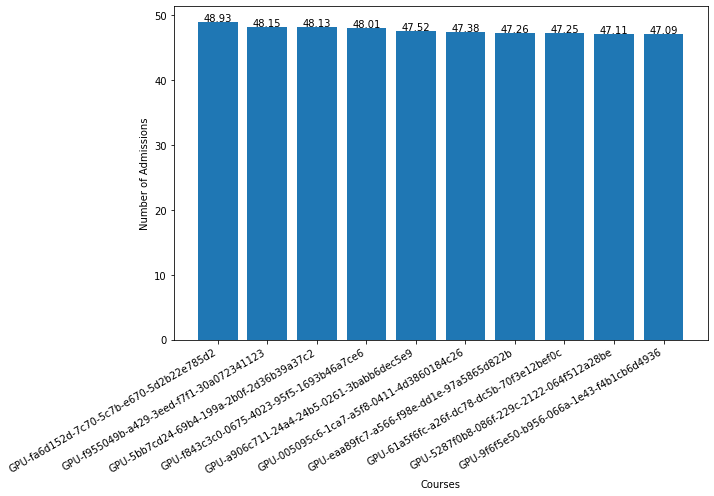

In [ ]:


# creating data on which bar chart will be plot
x = avgtemp.gpuUUID
y = avgtemp.gpuTempC
  
# setting figure size by using figure() function 
plt.figure(figsize = (10, 7))
  
# making the bar chart on the data
plt.bar(x, y)
  
# calling the function to add value labels
addlabels(x, y)
plt.xticks(rotation=30, ha='right')
# giving title to the plot

  
# giving X and Y labels
plt.xlabel("Courses")
plt.ylabel("Number of Admissions")
  
# visualizing the plot
plt.show()

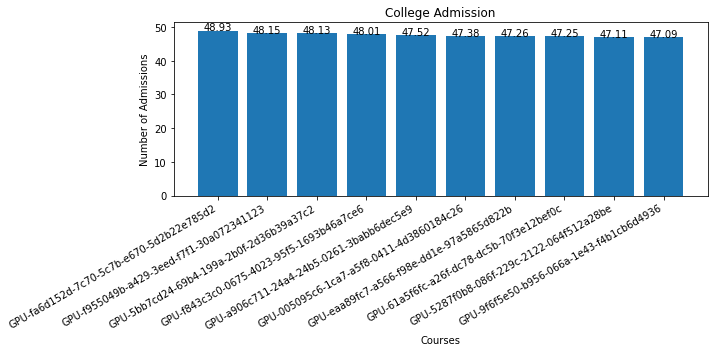

In [ ]:
# importing library
import matplotlib.pyplot as plt
  
# function to add value labels


  
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = avgtemp.gpuUUID
    y = avgtemp.gpuTempC
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (10,5))
      
    # making the bar chart on the data
    plt.bar(x, y)
      
    # calling the function to add value labels
    #addlabels(x, y)
      
    plt.xticks(rotation=30, ha='right')  
    # giving title to the plot
    plt.title("College Admission")
      
    # giving X and Y labels
    plt.xlabel("Courses")
    plt.ylabel("Number of Admissions")
    
    for i in range(len(x)):
      plt.text(i, y.iloc[i],round(y.iloc[i],2), ha = 'center') 
      
    # visualizing the plot
    plt.show()

In [ ]:
#y.iloc[0,1]
y.iloc[0]

48.92671552298468

0 48.92671552298468
1 48.153231179213854
2 48.12892451569806
3 48.00867244829887
4 47.523046092184366
5 47.37908061292472
6 47.25516322451699
7 47.24749833222148
8 47.10933333333333
9 47.08860759493671


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


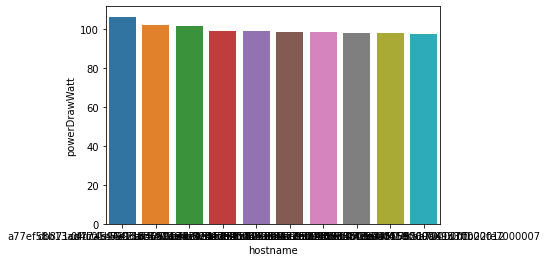

In [ ]:
p = sns.barplot('hostname', 'powerDrawWatt', data=avghostpower, ci=False)

In [ ]:
plt.bar(q_1_4.eventName, q_1_4.delta_dttm, label="Blue Bar", color='b')

plt.plot()

plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()

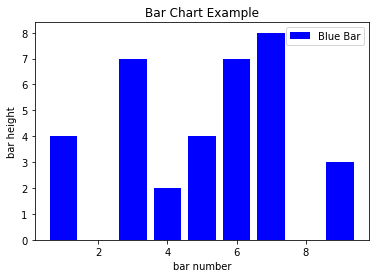

In [ ]:
import matplotlib.pyplot as plt

# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = [1, 3, 4, 5, 6, 7, 9]
y1 = [4, 7, 2, 4, 7, 8, 3]

# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Blue Bar", color='b')
plt.plot()

plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()